C:\Users\bhatt\AppData\Local\Temp\ipykernel_27500\683343360.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed
C:\Users\bhatt\AppData\Local\Temp\ipykernel_27500\683343360.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


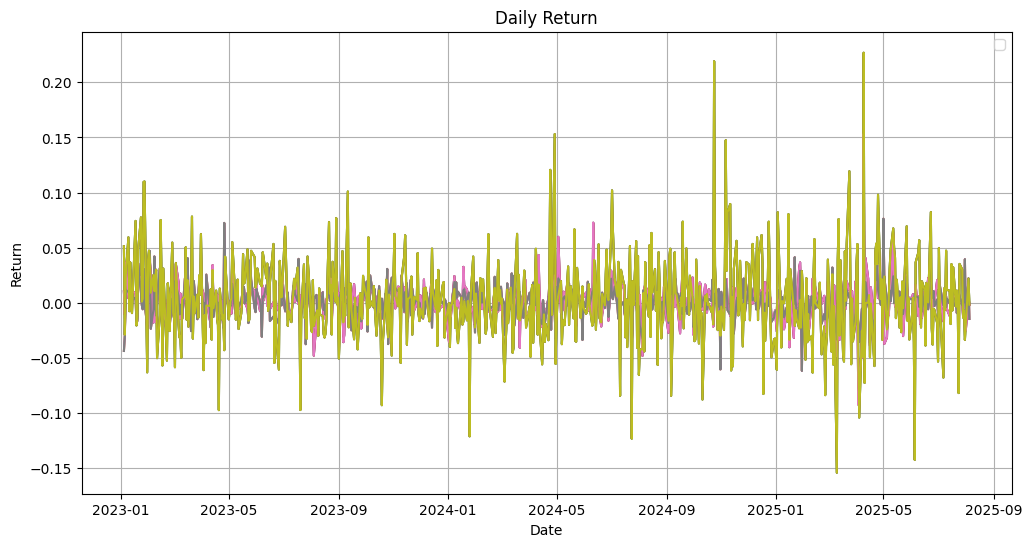

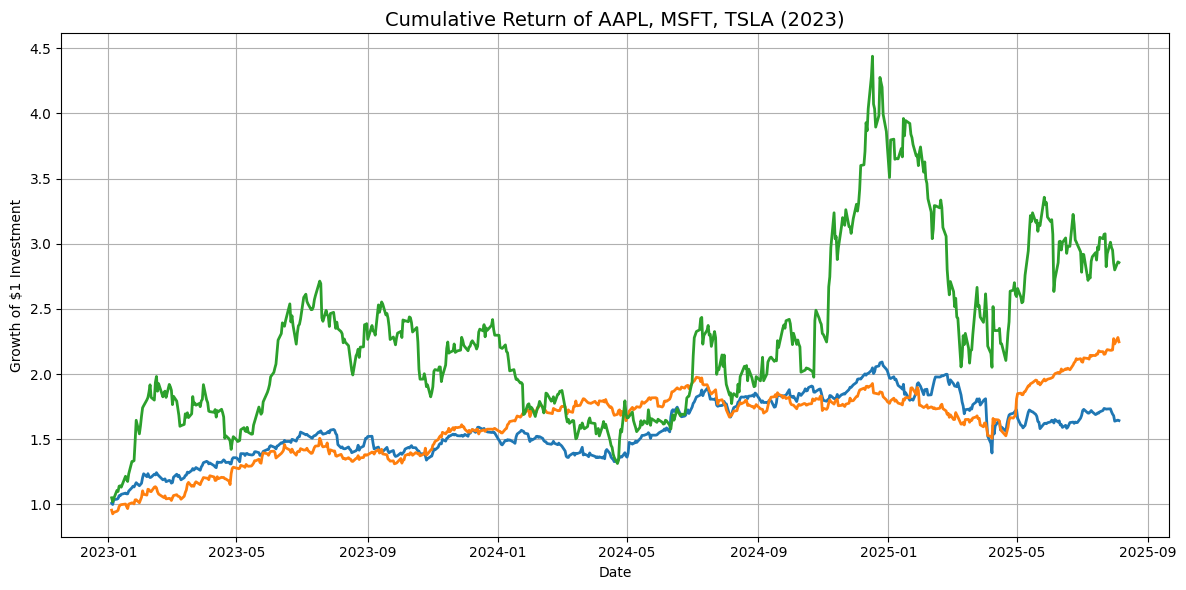

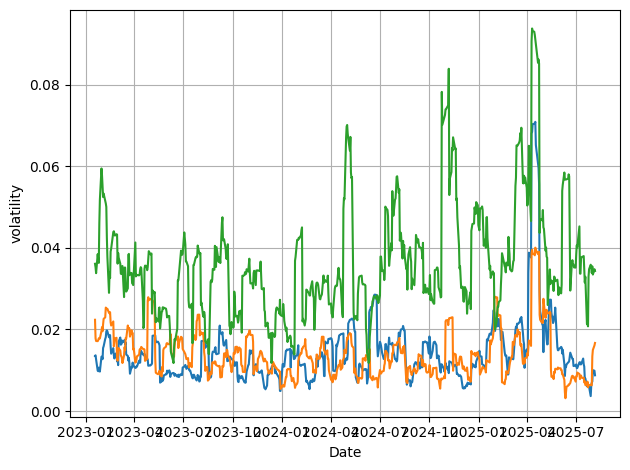

Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.528397  0.456693
MSFT    0.528397  1.000000  0.370456
TSLA    0.456693  0.370456  1.000000


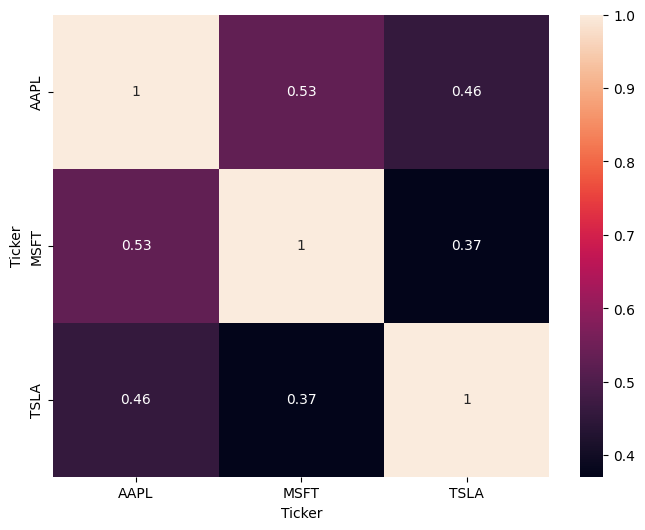

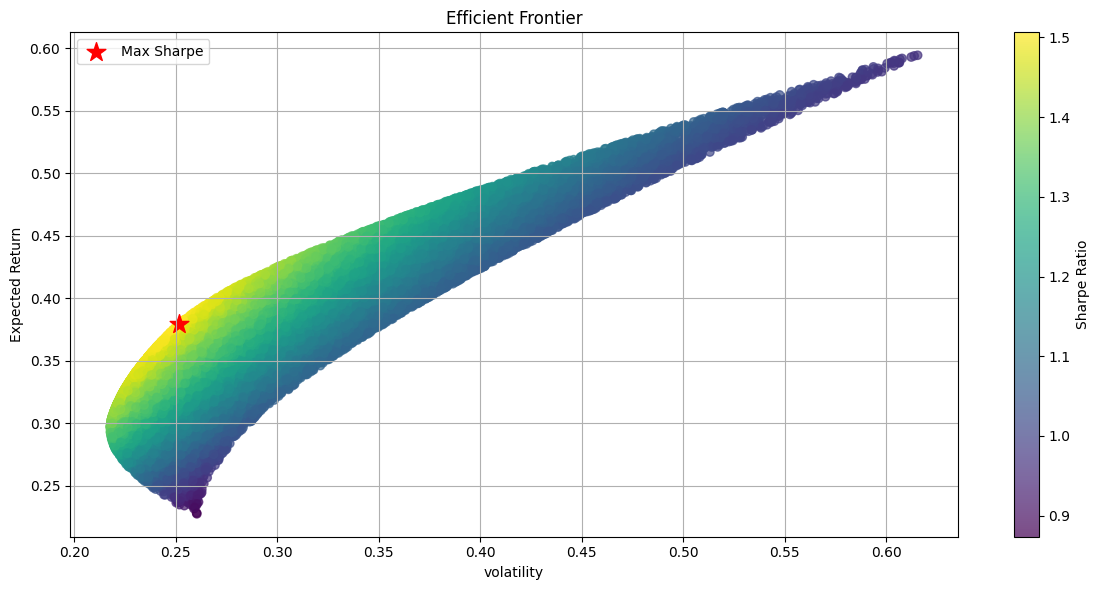

AAPL: 0.05%
MSFT: 85.95%
TSLA: 14.00%


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# tickers and dates
tickers = ['AAPL', 'MSFT', 'TSLA']
start_date = '2023-01-01'
end_date = '2026-01-01'

# Download data
all_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# daily returns
daily_returns = all_data.pct_change().dropna()
returns = all_data[tickers].pct_change()



#cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(daily_returns)
plt.title("Daily Return")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()
                  

#  Plot cumulative returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker, linewidth=2)

plt.title("Cumulative Return of AAPL, MSFT, TSLA (2023)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.grid(True)
plt.tight_layout()
plt.show()

#volatility

volatility = daily_returns.rolling(10).std()
for ticker in tickers:
   plt.plot(volatility[ticker])
plt.ylabel("volatility")
plt.xlabel("Date")
plt.tight_layout()
plt.grid(True)
plt.show()

#correlation

correlation_matrix = daily_returns.corr()
print(correlation_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

mean_return = returns.mean()
cov_matrix= returns.cov()
num_assets = len(tickers)

num_portfolios = 40000
results = np.zeros((3, num_portfolios))
weights_record = []


for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
    port_return = np.dot(weights, mean_return) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe = port_return/port_volatility

    results[0, i ] = port_volatility
    results[1, i ] = port_return
    results[2, i ] = sharpe

max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = weights_record[max_sharpe_idx]

plt.figure(figsize=(12,6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

plt.scatter(results[0,max_sharpe_idx], results[1, max_sharpe_idx], color='red', marker = '*', s= 200, label='Max Sharpe')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for i, ticker in enumerate(tickers):
    print(f"{ticker}: {max_sharpe_allocation[i]:.2%}")








